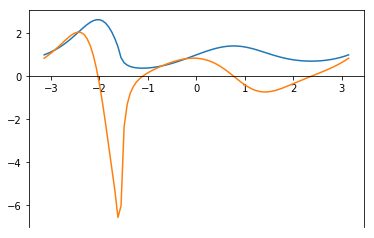

In [1]:
#Q1
from sympy import *
import numpy as np
% matplotlib inline

x = symbols('x')
diff((sin(x)+1)**sin(cos(x)),x)
cvec = np.linspace(-np.pi, np.pi, 100)
def f_value(x):
    fvalue = (sin(x)+1)**sin(cos(x))
    return fvalue
def f_prime(x):
    fprime = (-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))
    return fprime
np.array([f_prime(x) for x in cvec])

from matplotlib import pyplot as plt
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

y = np.array([f_value(x) for x in cvec])
fprime = np.array([f_prime(x) for x in cvec])

plt.plot(cvec,y)
plt.plot(cvec,fprime)

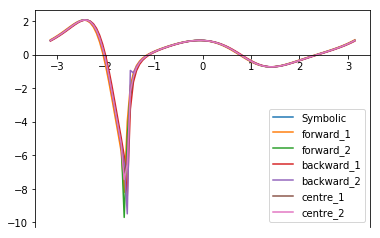

In [2]:
#Q2
def forward_1(f, x, h):
    fvals_1 = (f(x + h) - f(x)) / h
    return fvals_1
def forward_2(f, x, h):
    fvals_2 = (-3*f(x) + 4*f(x + h) - f(x + 2*h)) / (2*h)
    return fvals_2
def backward_1(f, x, h):
    bvals_1 = (f(x) - f(x - h)) / h
    return bvals_1
def backward_2(f, x, h):
    bvals_2 = (3*f(x) - 4*f(x - h) + f(x - 2*h)) / (2*h)
    return bvals_2
def centre_1(f, x, h):
    cvals_1 = (f(x + h) - f(x - h)) / (2*h)
    return cvals_1
def centre_2(f, x, h):
    cvals_2 = (f(x - 2*h) - 8*f(x - h) + 8*f(x + h) - f(x + 2*h)) / (12*h)
    return cvals_2

h = 20**(-1)
def y_cvec_array(f, x, h):
    y_array = np.array([f(f_value, x, h) for x in cvec])
    return y_array

forward_prime_1 = y_cvec_array(forward_1, x, h)
forward_prime_2 = y_cvec_array(forward_2, x, h)
backward_prime_1 = y_cvec_array(backward_1, x, h)
backward_prime_2 = y_cvec_array(backward_2, x, h)
centre_prime_1 = y_cvec_array(centre_1, x, h)
centre_prime_2 = y_cvec_array(centre_2, x, h)

from matplotlib import pyplot as plt
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
fprime = np.array([f_prime(x) for x in cvec])
plt.plot(cvec, fprime)
plt.plot(cvec, forward_prime_1)
plt.plot(cvec, forward_prime_2)
plt.plot(cvec, backward_prime_1)
plt.plot(cvec, backward_prime_2)
plt.plot(cvec, centre_prime_1)
plt.plot(cvec, centre_prime_2)
plt.legend(['Symbolic', 'forward_1', 'forward_2', 'backward_1', 'backward_2', 'centre_1', 'centre_2'], loc='lower right')


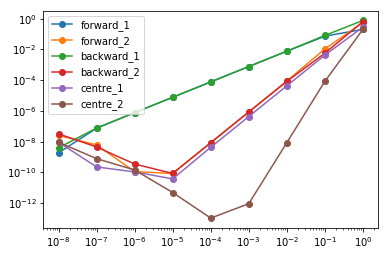

In [3]:
#Q3
x0 = 1
fx0 = f_prime(x0)
hh = np.logspace(-8, 0, 9)

def error_array(f, x, hvec):
    y_array = np.array([f(f_value, x, hi) for hi in hvec])
    abs_err = abs(y_array - fx0)
    return abs_err

errf_1 = error_array(forward_1, x0, hh)
errf_2 = error_array(forward_2, x0, hh)
errb_1 = error_array(backward_1, x0, hh)
errb_2 = error_array(backward_2, x0, hh)
errc_1 = error_array(centre_1, x0, hh)
errc_2 = error_array(centre_2, x0, hh)
plt.loglog(hh, errf_1, marker = 'o')
plt.loglog(hh, errf_2, marker = 'o')
plt.loglog(hh, errb_1, marker = 'o')
plt.loglog(hh, errb_2, marker = 'o')
plt.loglog(hh, errc_1, marker = 'o')
plt.loglog(hh, errc_2, marker = 'o')
plt.legend(['forward_1', 'forward_2', 'backward_1', 'backward_2', 'centre_1', 'centre_2'], loc='upper left')
axes = plt.gca()

plt.show()

In [4]:
#Q4
arr_angle = np.load('plane.npy')
a = 500

def get_a_radian(i):
    a1 = arr_angle[i-7][1]
    a2 = a1/180*(np.pi)
    return a2

def get_b_radian(i):
    b1 = arr_angle[i-7][2]
    b2 = b1/180*(np.pi)
    return b2

def get_x(a_r,b_r):
    x = a*tan(b_r)/(tan(b_r)-tan(a_r))
    return x

def get_y(a_r,b_r):
    y = a*tan(b_r)*tan(a_r)/(tan(b_r)-tan(a_r))
    return y

def get_x_prime1(i):
    x_1 = get_x(get_a_radian(i+1),get_b_radian(i+1))
    x_2 = get_x(get_a_radian(i),get_b_radian(i))
    prime_x = x_1 - x_2
    return prime_x

def get_y_prime1(i):
    y_1 = get_y(get_a_radian(i+1),get_b_radian(i+1))
    y_2 = get_y(get_a_radian(i),get_b_radian(i))
    prime_y = y_1 - y_2
    return prime_y

def get_x_prime2(i):
    x_1 = get_x(get_a_radian(i+1),get_b_radian(i+1))
    x_2 = get_x(get_a_radian(i-1),get_b_radian(i-1))
    prime_x = (x_1 - x_2)/2
    return prime_x

def get_y_prime2(i):
    y_1 = get_y(get_a_radian(i+1),get_b_radian(i+1))
    y_2 = get_y(get_a_radian(i-1),get_b_radian(i-1))
    prime_y = (y_1 - y_2)/2
    return prime_y

def get_x_prime3(i):
    x_1 = get_x(get_a_radian(i),get_b_radian(i))
    x_2 = get_x(get_a_radian(i-1),get_b_radian(i-1))
    prime_x = x_1 - x_2
    return prime_x

def get_y_prime3(i):
    y_1 = get_y(get_a_radian(i),get_b_radian(i))
    y_2 = get_y(get_a_radian(i-1),get_b_radian(i-1))
    prime_y = y_1 - y_2
    return prime_y

def get_speed1(i):
    prime = (get_x_prime1(i)**(2)+get_y_prime1(i)**2)**(0.5)
    return prime

def get_speed2(i):
    prime = (get_x_prime2(i)**(2)+get_y_prime2(i)**2)**(0.5)
    return prime

def get_speed3(i):
    prime = (get_x_prime3(i)**(2)+get_y_prime3(i)**2)**(0.5)
    return prime


import pandas as pd
df = pd.DataFrame()
df7 = pd.DataFrame([[7, get_speed1(7)]])
df = df.append(df7)
ls_t = [8,9,10,11,12,13]
for i in ls_t:
    df_i = pd.DataFrame([[i, get_speed2(i)]])
    df = df.append(df_i)
df14 = pd.DataFrame([[14, get_speed3(14)]])
df = df.append(df14)

df.rename(columns={0: 't', 1: 'speed'}, inplace=True)

df

,t,speed
0,7,46.4242006221354
0,8,47.0010393809513
0,9,48.9988051403671
0,10,50.0994416296545
0,11,48.2903508382033
0,12,51.5645590492716
0,13,53.9230335450529
0,14,51.5148005696332


In [5]:
#Q5
h0 = 10**(-1)
def f_val(x,y):
    fval = [[x**2],[x**3-y]]
    return fval
def f_pri(f,x,h):
    x1=x[0][0]
    x2=x[1][0]
    prime1 = (np.array(f(x1+h,x2))-np.array(f(x1-h,x2)))/(2*h)
    prime2 = (np.array(f(x1,x2+h))-np.array(f(x1,x2-h)))/(2*h)
    list1 = prime1.tolist()
    list2 = prime2.tolist()
    list_total = [[list1[0][0],list2[0][0]],[list1[1][0],list2[1][0]]]
    return list_total
x0 = [[1],[1]]
f_pri(f_val,x0,h0)


[[2.0000000000000004, 0.0], [3.0100000000000016, -1.0000000000000002]]

In [6]:
#to check with sympy
x1 = symbols('x1')
x2 = symbols('x2')
diff1 = diff((x1**2),x1)
diff2 = diff((x1**2),x2)
diff3 = diff((x1**3-x2),x1)
diff4 = diff((x1**3-x2),x2)
def f_pri2(x):
    x1 = x[0][0]
    x2 = x[1][0]
    f_prime = [[2*x1,0],[3*x1**2,-1]]
    return f_prime
x0 = [[1],[1]]
f_pri2([[1],[1]])

[[2, 0], [3, -1]]

Text(0,0.5,'Absolute Error')

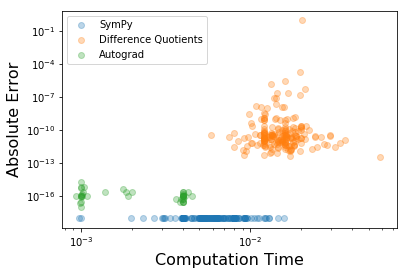

In [8]:
#Q7
#please pip install autograd
from autograd import numpy as anp
from autograd import grad
import time
import random

h1 = 20**(-2)
g = lambda x: (anp.sin(x) + 1)**anp.sin(anp.cos(x))

s_time = []
s_errs = []
g_time = []
g_errs = []
d_time = []
d_errs = []

def cal_time(n):
    for i in range(n):
        x0 = random.uniform(-2*np.pi, 2*np.pi)
        # Sympy
        s_start = time.time()
        s_val = f_prime(x0)
        s_end = time.time()
        s_t = s_end - s_start
        s_time.append(s_t)
        s_errs.append(1e-18)
        # Fourth-order centered difference quotient
        d_start = time.time()
        d_val = centre_2(f_value, x0, h1)
        d_end = time.time()
        d_t = d_end - d_start
        d_err = abs(d_val - s_val)
        d_time.append(d_t)
        d_errs.append(d_err)
        # Autograd
        g_start = time.time()
        dg = grad(g)
        g_val = dg(x0)
        g_end = time.time()
        g_t = g_end - g_start
        g_err = abs(g_val - s_val)
        g_time.append(g_t)
        g_errs.append(g_err)

cal_time(200)

plt.xscale("log")
plt.yscale("log")
plt.scatter(s_time, s_errs, alpha =0.3)
plt.scatter(d_time, d_errs, alpha =0.3)
plt.scatter(g_time, g_errs, alpha =0.3)
plt.legend(['SymPy', 'Difference Quotients', 'Autograd'], loc='upper left')
plt.xlabel('Computation Time', fontsize=16)
plt.ylabel('Absolute Error', fontsize=16)
